# Vehicle Object Detection

## Imports

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import torch
import random
import cv2
from tqdm import tqdm
from matplotlib import pyplot as plt
import segmentation_models_pytorch as smp
import albumentations as album
from PIL import Image
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import random_split
from sklearn.metrics import accuracy_score
import plotly.express as px
import torchmetrics
from torchmetrics import MeanAbsolutePercentageError


%matplotlib inline

/home/ah2719/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Global Variables

In [20]:
ROOT_DIR_PATH = os.path.abspath('..')
IMAGE_PATH = os.path.join(ROOT_DIR_PATH, "data/example.jpg")
INFERENCE_PATH = os.path.join(ROOT_DIR_PATH, "data/vehicle_counts.csv")

## General Functions

## YOLOv5 Model Inference

In [17]:
# Image
img_path = IMAGE_PATH

In [4]:
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

model

Using cache found in /home/ah2719/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-11-12 Python-3.8.10 torch-1.13.0+cu117 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [18]:
# Inference
results = model(img_path)

# Results
results.print()
results.save()  # or .show()

image 1/1: 307x305 1 car
Speed: 200.1ms pre-process, 196.3ms inference, 139.5ms NMS per image at shape (1, 3, 640, 640)
Saved 1 image to runs/detect/exp


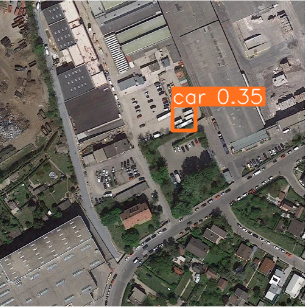

: 

In [22]:
results.show()

In [21]:
results.pandas().xyxy[0].to_csv(INFERENCE_PATH, index=False)  # img predictions (pandas)